In [19]:
import sys
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime, timedelta
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils, Defs 
from hostelprices.database import Database
from hostelprices.analysis import HostelDF

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
# collection_name = "main_coll-main-12_21_2022-20_19"

DB = Database(
    client_id=client_id, data_base_name=data_base_name#, collection_name=collection_name
    )
DB.filterCollections(contains='-main-')

In [21]:
df_all = DB.getPandasDf()
df_all

,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time,collection,collection time
0,639b3a91263daf73fcc83118,3.420000,6.4,1.2,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889,main_coll-main-12_15_2022-15_16,2022-12-15 15:16:00
0,639b5b5d5d7dbe80d9247fd6,3.520000,9.0,0.2,Lisbon,2023-02-13,2,2022-12-15 17:37:33.343,main_coll-main-12_15_2022-17_36,2022-12-15 17:36:00
0,639b5622b563a42000075f63,25.354493,9.7,0.3,Lisbon,2023-02-13,2,2022-12-15 17:15:13.907,main_coll-main-12_15_2022-17_14,2022-12-15 17:14:00
0,63abff2f61c4c13e1621d7dd,29.179217,9.7,0.5,Lisbon,2023-01-13,1,2022-12-28 08:24:16.305,main_coll-main-12_28_2022-08_23,2022-12-28 08:23:00
0,639b3fc6e9f8138f4e5356c0,18.781106,9.3,1.3,Lisbon,2023-02-13,2,2022-12-15 15:39:49.848,main_coll-main-12_15_2022-15_38,2022-12-15 15:38:00
...,...,...,...,...,...,...,...,...,...,...
227,63abff2f61c4c13e1621d8c0,15.060241,4.9,1.6,Seville,2023-01-17,5,2022-12-28 08:32:36.845,main_coll-main-12_28_2022-08_23,2022-12-28 08:23:00
227,63ab54fb01900892c026197b,2.490000,9.1,1.1,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00
228,63ab54fb01900892c026197c,17.887404,7.8,1.2,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00
229,63ab54fb01900892c026197d,15.063077,4.0,1.6,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00


In [22]:
hdf = HostelDF(df_all)
hdf

,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time,collection,collection time,date from,request time,rating per price,days before
0,639b3a91263daf73fcc83118,3.420000,6.4,1.2,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889,main_coll-main-12_15_2022-15_16,2022-12-15 15:16:00,2023-02-13,2022-12-15 15:17:36.889,1.871345,59.363889
0,639b5b5d5d7dbe80d9247fd6,3.520000,9.0,0.2,Lisbon,2023-02-13,2,2022-12-15 17:37:33.343,main_coll-main-12_15_2022-17_36,2022-12-15 17:36:00,2023-02-13,2022-12-15 17:37:33.343,2.556818,59.266667
0,639b5622b563a42000075f63,25.354493,9.7,0.3,Lisbon,2023-02-13,2,2022-12-15 17:15:13.907,main_coll-main-12_15_2022-17_14,2022-12-15 17:14:00,2023-02-13,2022-12-15 17:15:13.907,0.382575,59.281944
0,63abff2f61c4c13e1621d7dd,29.179217,9.7,0.5,Lisbon,2023-01-13,1,2022-12-28 08:24:16.305,main_coll-main-12_28_2022-08_23,2022-12-28 08:23:00,2023-01-13,2022-12-28 08:24:16.305,0.332428,15.650694
0,639b3fc6e9f8138f4e5356c0,18.781106,9.3,1.3,Lisbon,2023-02-13,2,2022-12-15 15:39:49.848,main_coll-main-12_15_2022-15_38,2022-12-15 15:38:00,2023-02-13,2022-12-15 15:39:49.848,0.495179,59.348611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,63abff2f61c4c13e1621d8c0,15.060241,4.9,1.6,Seville,2023-01-17,5,2022-12-28 08:32:36.845,main_coll-main-12_28_2022-08_23,2022-12-28 08:23:00,2023-01-17,2022-12-28 08:32:36.845,0.325360,19.650694
227,63ab54fb01900892c026197b,2.490000,9.1,1.1,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,2023-01-17,2022-12-27 20:26:24.836,3.654618,20.153472
228,63ab54fb01900892c026197c,17.887404,7.8,1.2,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,2023-01-17,2022-12-27 20:26:24.836,0.436061,20.153472
229,63ab54fb01900892c026197d,15.063077,4.0,1.6,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,2023-01-17,2022-12-27 20:26:24.836,0.265550,20.153472


In [23]:
hdf_sel = hdf.filter((hdf.city=='Lisbon') & (hdf.date_from=='2023-01-13') & (hdf["distance (km)"]<10) & (hdf["rating"]>5) & (hdf["duration (days)"]==5))
len(hdf_sel)

404

In [24]:
print(hdf_sel.city.value_counts())
print(hdf_sel.date_from.value_counts())
print(hdf_sel[Defs.colName('time_before')].value_counts())
print(hdf_sel[Defs.colName('duration')].value_counts())

Lisbon    404
Name: city, dtype: int64
2023-01-13    404
Name: date_from, dtype: int64
16.153472    38
15.650694    38
16.650694    37
17.154167    37
20.153472    37
22.153472    37
17.650694    37
19.651389    36
18.651389    36
18.154167    36
20.650694    35
Name: days before, dtype: int64
5    404
Name: duration (days), dtype: int64


c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


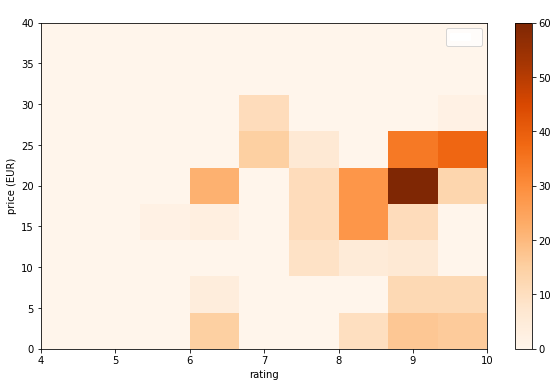

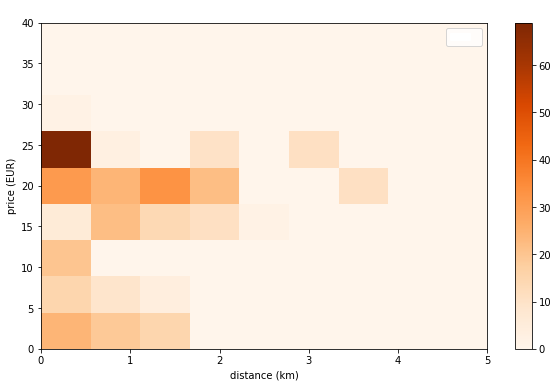

In [25]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


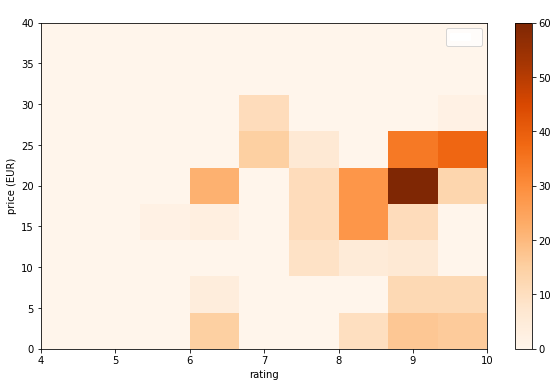

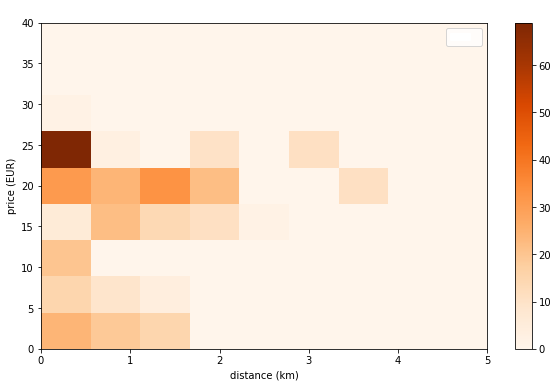

In [26]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

In [27]:
def processed_values_plot(axs, city='Lisbon', date_from='2023-01-13', max_dist=5, min_rating=5, duration=5, label=None):
    hdf_sel = hdf.filter(
        (hdf.city==city) & (hdf.date_from==date_from) & (hdf["distance (km)"]<max_dist) & (hdf["rating"]>min_rating) & (hdf["duration (days)"]==duration)
        )
    time_before, avg_price, n_hostels = hdf_sel.cummulated()
    axs[0].plot(time_before, avg_price, label=label)
    axs[0].set_xlabel('days before')
    axs[0].set_ylabel('lowest price')
    axs[1].plot(time_before, n_hostels, label=label)
    axs[1].set_xlabel('days before')
    axs[1].set_ylabel('number of hostels')

C:\Users\fsgl1\AppData\Local\Temp\ipykernel_29444\2642319182.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


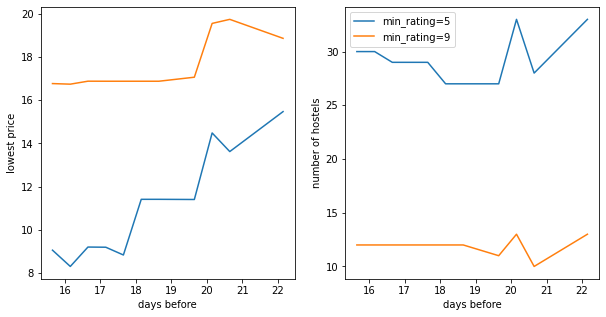

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, duration=5, label='min_rating=5')
processed_values_plot(axs, duration=5, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()

C:\Users\fsgl1\AppData\Local\Temp\ipykernel_29444\1563693396.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


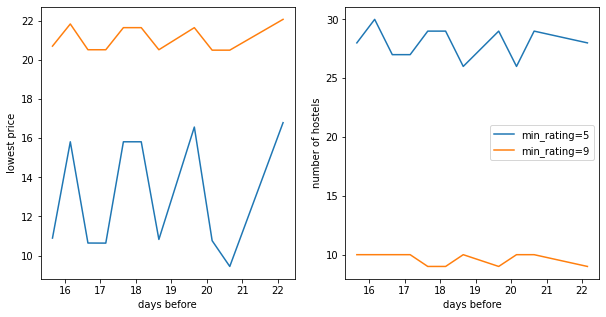

In [29]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, duration=1, label='min_rating=5')
processed_values_plot(axs, duration=1, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()